# <font style="color:rgb(50,120,229)">Overview</font>
In this section, we will go over some basic mathematical operations. The most basic operations like addition and multiplication are very heavily used in all image processing and computer vision applications. We will take a few examples to illustrate the concepts.

We will also look at a few pitfalls in OpenCV which one should be aware of while doing mathematical operations on matrices.

Lot of CV practitioners have a difficult time with arithmetic operations since they don't take care of the data types they are dealing with fully and waste a lot of time on debugging trivial bugs.

We will look into two simple operations on images that change the brightness and contrast of the image which use the arithmetic operations like addition and multiplication respectively.

# <font style = "color:rgb(50,120,229)">Datatype Conversion</font>
Before we get into any mathematical operations, it is very important to understand the data types used and how to convert from one to another.

As we saw in previous modules, an image is represented as a numpy array once it's read using **`cv2.imread`** function. The default datatype of this object is **unsigned integer** (**8 bits**). For most Arithmentic operations like multiplication or division, we need to convert the array type to floating point with each pixel having **16, 32 or 64 bits** of data. This helps prevent overflow while working with the images.

Most of the time we dont need to work using float64 and float32 is enough for most image processing operations ( even float16 )

In [3]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read image
image = cv2.imread(os.path.join(DATA_PATH,"images/boy.jpg"))

In [5]:
scalingFactor = 1/255.0

# Convert unsigned int to float
image = np.float32(image)
# Scale the values so that they lie between [0,1]
image = image * scalingFactor

The scale or the scaling factor reduces the range of **0-255** to **0-1**, hence all the floating point numbers now range between 0-1. When we convert back to unsigned integer we use the **reciprocal** of the scaling factor and the range is converted from 0-1 to 0-255.

In [6]:
#Convert back to unsigned int
image = image * (1.0/scalingFactor)
image = np.uint8(image)

# <font style="color:rgb(50,120,229)">Contrast Enhancement</font>
Many definitions of contrast exist in literature. Without going into the gory details, roughly speaking it is the difference in intensity between the brightest and darkest regions of a given image. Higher the difference, higher is the contrast. The maximum contrast of an image is also known as **Dynamic Range**. In an image with good contrast, objects are easily discernible.

One of the easiest ways to improve contrast of an image is Intensity Scaling

In this approach, a scale factor ( $\alpha$ ) is multiplied with intensity values of all the pixels. Given below is the code snippet to do the same. Intensity scaling is represented by the following equation 

 $$
 I_o = \alpha I
 $$


## <font style="color:rgb(50,120,229)">Code for Contrast Enhancement</font>

In the code below, we will apply the above mentioned formulas to get contrast enhanced images.

We will increase the contrast by 30%.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


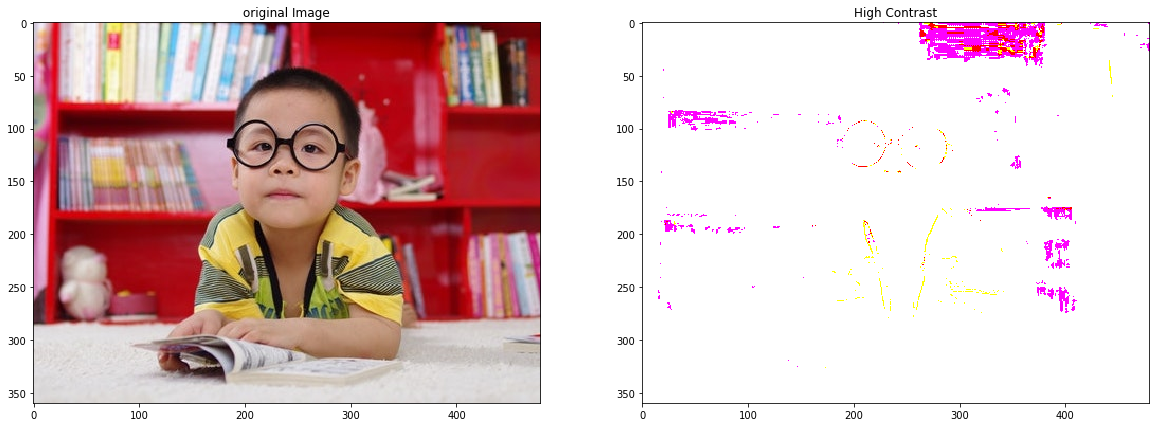

In [7]:
contrastPercentage = 30

# Multiply with scaling factor to increase contrast
contrastHigh = image * (1+contrastPercentage/100)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(contrastHigh[...,::-1]);plt.title("High Contrast");

## <font style="color:rgb(50,120,229)">What's wrong?</font>
Why did these simple operations gave such undesirable results? To answer that, let us do a quick check of the image properties.


In [8]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(contrastHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Contrast Image Highest Pixel Intensity : {}".format(contrastHigh.max()))

Original Image Datatype : uint8
Contrast Image Datatype : float64
Original Image Highest Pixel Intensity : 255
Contrast Image Highest Pixel Intensity : 331.5


### <font style = "color:rgb(8,133,37)">Issue with Contrast Enhancement code </font>
The white display in case of contrastHigh is more of a display issue. Display functions expect the images to be in either of these 2 formats:
1. If the image is in float datatype, then the range should be [0,1]. Anything above 1 is considered as white.
1. If the image is in int datatype, then the range should be [0,255]. Anything above 255 is considered as white.

### <font style = "color:rgb(8,133,37)">Solution </font>
We can see that the datatype of contrastHigh is float and the max value is 331.5. This means that in order to get rid of this display problem, we can consider the above 2 points and make the image conform to any of the valid formats. So, to get rid of the problem, we can do the following:
1. **`Clip`** or **`Normalize`** the intensity values to **`0 ~ 255`** and change the data type to **`uint8`**.
1. If you want to keep the image in float format, then **`Normalize`** the instensity values so that it lies in **`[0,1]`.**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


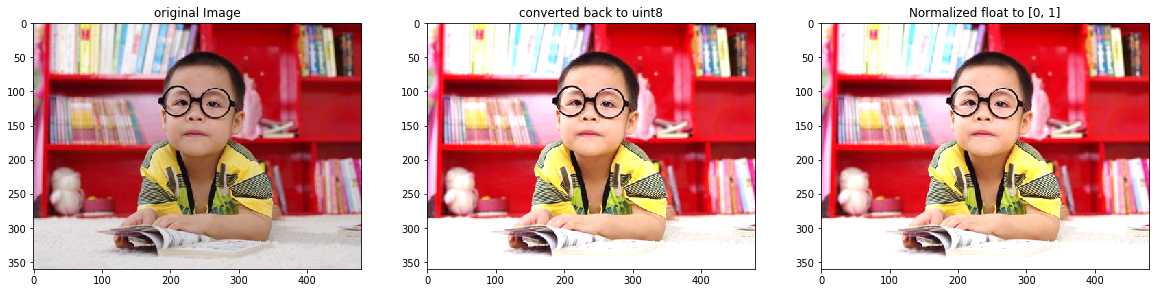

In [9]:
contrastPercentage = 30

# Clip the values to [0,255] and change it back to uint8 for display
contrastImage = image * (1+contrastPercentage/100)
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)

# Convert the range to [0,1] and keep it in float format
contrastHighFloat = image * (1+contrastPercentage/100.0)
maxValue = image.max()
contrastHighNormalized01 = contrastHighFloat/maxValue

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(contrastHighClippedUint8[...,::-1]);plt.title("converted back to uint8");
plt.subplot(133);plt.imshow(contrastHighNormalized01[...,::-1]);plt.title("Normalized float to [0, 1]");


# <font style="color:rgb(50,120,229)">Brightness Enhancement</font>
Brightness is a measure of light falling on the scene. In RGB color space, it can be thought of as the arithmetic mean of the R, G and B color values. To make an image brighter, the intensity values should be increased by some offset ( $\beta$ ) and vice-versa. 

If $I$ is the input image, and $I_o$ is the output image, brightness enhanced image is given by the equation 

$$
I_o = I + \beta
$$

## <font style="color:rgb(50,120,229)">Code for Brightness Enhancement</font>

In the code below, we will apply the above mentioned formulas to get brightness enhanced images.

We will increase the brightness by 50 intensity levels. ( Note that there are 255 intensity levels in a image)

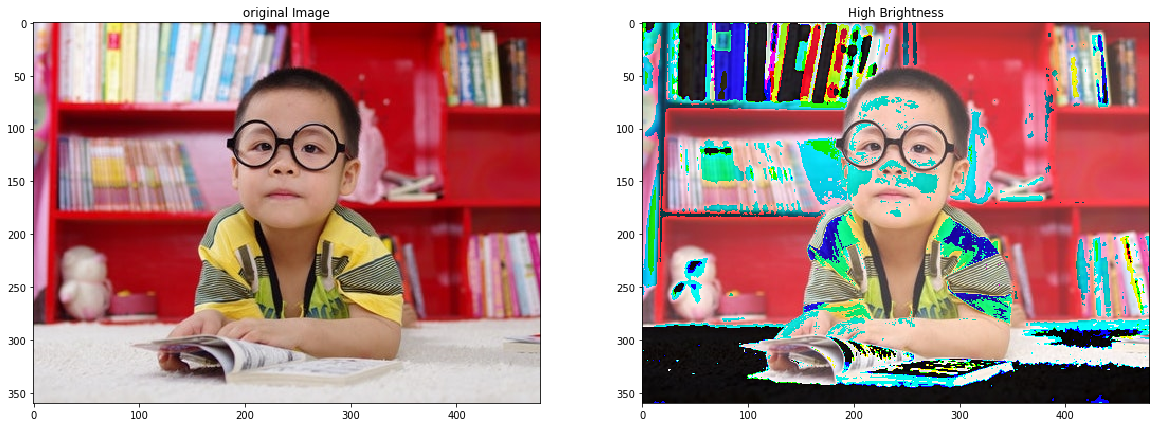

In [10]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHigh = image + brightnessOffset

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(brightHigh[...,::-1]);plt.title("High Brightness");

## <font style="color:rgb(50,120,229)">What's wrong?</font>
Why did these simple operations gave such undesirable results? To answer that, let us do a quick check of the image properties.


In [11]:
print("Original Image Datatype : {}".format(image.dtype))
print("Brightness Image Datatype : {}\n".format(brightHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Brightness Image Highest Pixel Intensity : {}".format(brightHigh.max()))


Original Image Datatype : uint8
Brightness Image Datatype : uint8

Original Image Highest Pixel Intensity : 255
Brightness Image Highest Pixel Intensity : 255


### <font style="color:rgb(50,120,229)">Issue with Brightness Enhancement Code </font>
The highest pixel intensity in the original image is 255. Since we have added 50 to each pixel, the highest pixel intensity in `brightHigh` image should have been `305`. But we can see that the highest pixel intensity is in brightHigh image is `255`.

This is happening because of the uint8 datatype. Since the maximum value that a unsigned 8 bit integer can hold is 255, any value greater than that is causing an **`overflow`**.

This is a much more serious problem than the display issue we encountered earlier. These kind of bugs go undetected and cause havoc in the final application as they will be difficult to debug also.

Let us take an example to understand what was going on in the above case.

In [12]:
# Sample 2x2 matrix of type uint8
a = np.array([[100, 110], 
              [120, 130]], dtype='uint8')
print(a)

[[100 110]
 [120 130]]


In [13]:
# Add 130 so that the last element encounters overflow
print(a + 130)

[[230 240]
 [250   4]]


You can see that the element a[1,1] should have been 260. but instead it overflowed and rolled over. There will be a similar problem if we subtract.

Let us see another interesting nuisance.

In [14]:
print(a - 130)

[[226 236]
 [246   0]]


And this?

In [15]:
print(a + (-130))

[[-30 -20]
 [-10   0]]


In the first case, both operands (a and 130) are uint8 and thus the output is uint8 and hence the underflow.

But in the second case, the 2nd operand has a type int16. Thus, the final output becomes int16 and thus, doesnt underflow.

This shows a major Pitfall of using uint8 while dealing with arithmetic operations on images.

Thus, it is important to convert the images to int or float(recommended) data types while doing arithmetic operations (like addition, subraction multiplication etc) on images to avoid undesirable results.

### <font style="color:rgb(8,133,37)">Solution </font>
In order to get rid of this problem, we can do the following:
1. use opencv to handle uint8 arithmetic
1. we should do all mathematical operations at a high dynamic range by converting the datatype of the operands to higher order integers or float, whichever is applicable.

We will see how to get the resolve these issues and get the correct outputs.

### <font style="color:rgb(8,133,37)">Solution 1 : Use opencv functions</font>

In [16]:
print(cv2.add(a,130))

[[230 240]
 [250 255]]


Clipping

### <font style="color:rgb(8,133,37)">Solution 2a: Convert to int32/int64</font>

You should convert to higher integer types to avoid overflow and underflow situations. 
Perform clipping if necessary and bring it back to uint8 in the final stage as that is what the display functions expect.

In [17]:
a_int32 = np.int32(a)
b = a_int32+130
print(b)

[[230 240]
 [250 260]]


In [18]:
print(b.clip(0,255))
b_uint8 = np.uint8(b.clip(0,255))
b_uint8

[[230 240]
 [250 255]]


array([[230, 240],
       [250, 255]], dtype=uint8)

You can do the same with float datatype as well

### <font style="color:rgb(8,133,37)">Solution 2b: Convert to normalized float32/float64 </font>



It is a good practice to convert the uint8 to float and normalize the range to [0,1] and change it back to [0,255] after doing all arithmetic operations

In [19]:
a_float32 = np.float32(a)/255
b = a_float32 + 130/255
print(b)

[[0.90196085 0.94117653]
 [0.9803922  1.0196079 ]]


In [20]:
c = b*255
print("Output = \n{}".format(c))
print("Clipped output= \n{}".format(c.clip(0,255)))
b_uint8 = np.uint8(c.clip(0,255))
print("uint8 output = \n{}".format(b_uint8))

Output = 
[[230.00002 240.00002]
 [250.00002 260.     ]]
Clipped output= 
[[230.00002 240.00002]
 [250.00002 255.     ]]
uint8 output = 
[[230 240]
 [250 255]]


# <font style="color:rgb(50,120,229)">Final Solution </font>

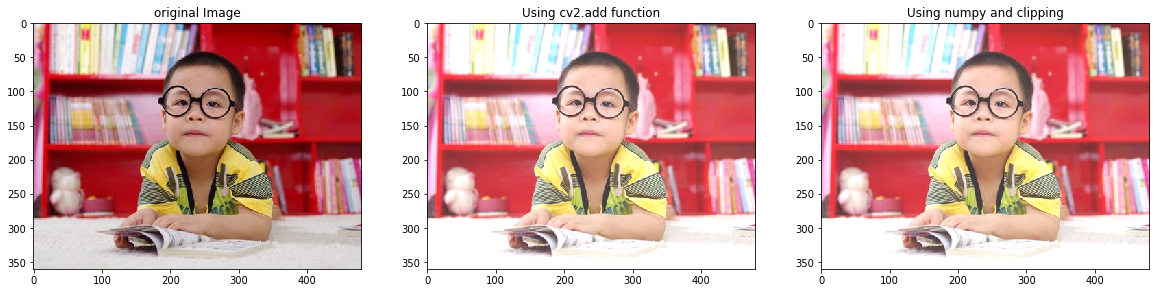

In [21]:
brightnessOffset = 50

# Add the offset for increasing brightness
brightHighOpenCV = cv2.add(image, np.ones(image.shape,dtype='uint8')*brightnessOffset)

brightHighInt32 = np.int32(image) + brightnessOffset
brightHighInt32Clipped = np.clip(brightHighInt32,0,255)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function");
plt.subplot(133);plt.imshow(brightHighInt32Clipped[...,::-1]);plt.title("Using numpy and clipping");

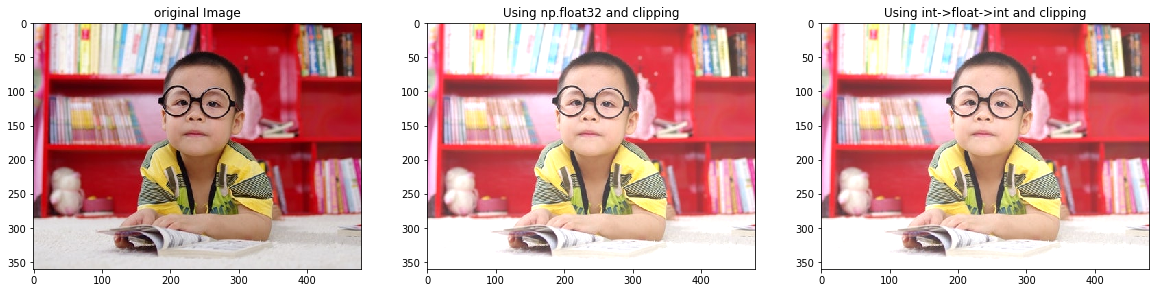

In [22]:
# Add the offset for increasing brightness
brightHighFloat32 = np.float32(image) + brightnessOffset
brightHighFloat32NormalizedClipped = np.clip(brightHighFloat32/255,0,1)

brightHighFloat32ClippedUint8 = np.uint8(brightHighFloat32NormalizedClipped*255)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighFloat32NormalizedClipped[...,::-1]);plt.title("Using np.float32 and clipping");
plt.subplot(133);plt.imshow(brightHighFloat32ClippedUint8[...,::-1]);plt.title("Using int->float->int and clipping");